# Using rapidfuzz to extract affiliatuons from RES

First the JSON output file from tezseract is read in and made into a useable dataframe

In [13]:
#Importing the libraries
import json
import pandas as pd
from rapidfuzz import process
import requests

# Load input files from github
tesseract_input = requests.get('https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/1_Input%20files%20and%20processing%20input%20files/1_1_Input%20files/Tesseract%20affiliation%20output/RES/RES_aff_output_1940_2010.json')
json_data = tesseract_input.json()

# Import JSON file
#f = open('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Tesseract affiliation output/RES/RES_aff_output_1940_2010.json')
#json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'RES'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

RES_aff_ref_output_1940_2010 = pd.DataFrame.from_records(Reference_Data_List)     
#RES_aff_ref_output_1940_2010.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Working files/RES_aff_ref_output_1940_2010.xlsx')        

Next the Unique list of universities is read in, this is used as a database to check the affiliton string against using rapidfuzz. 

In [14]:
# Load in the list of unique Universites from github stored in 2_fuzzy matching
affs = pd.read_excel("https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/2_Extracting%20affilitations/2_Fuzzy%20matching/University%20list/Unique%20Universities.xlsx")


#affs = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/University list/Unique Universities.xlsx')
print(affs.shape)

#testdata = RES_1940_2010.loc[0:20].reset_index(drop = True)
testdata = RES_aff_ref_output_1940_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(683, 5)


Next the test data is split line by line and parsed through the fuzzy matching library rapid fuzz.  Using the process.extract function a list of variables from a data frame being the unique universities is checked to see if there is a match in the input line from tesseract.

In [15]:
# For loop to iterate through lines in the input data and check to see if this exists in the created data base. 
# If it exists it is appended to a dataframe as the next affiliton for that paper
for i in range(len(testdata)):
    split = testdata.iat[i,6].split('\n\n')
    split_len = len(testdata.iat[i,6].split('\n\n'))
    affiliations = []
    count_no_aff = 0
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break

    print("Length = " , len(affiliations), ", Number = ",i)
    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"


Length =  0 , Number =  0
Length =  0 , Number =  1
Length =  1 , Number =  2
Length =  0 , Number =  3
Length =  0 , Number =  4
Length =  3 , Number =  5
Length =  0 , Number =  6
Length =  0 , Number =  7
Length =  0 , Number =  8
Length =  0 , Number =  9
Length =  0 , Number =  10
Length =  0 , Number =  11
Length =  0 , Number =  12
Length =  0 , Number =  13
Length =  0 , Number =  14
Length =  0 , Number =  15
Length =  0 , Number =  16
Length =  0 , Number =  17
Length =  1 , Number =  18
Length =  0 , Number =  19
Length =  0 , Number =  20
Length =  0 , Number =  21
Length =  0 , Number =  22
Length =  0 , Number =  23
Length =  0 , Number =  24
Length =  1 , Number =  25
Length =  0 , Number =  26
Length =  0 , Number =  27
Length =  0 , Number =  28
Length =  0 , Number =  29
Length =  8 , Number =  30
Length =  0 , Number =  31
Length =  1 , Number =  32
Length =  1 , Number =  33
Length =  0 , Number =  34
Length =  0 , Number =  35
Length =  1 , Number =  36
Length =  0

In [ ]:
# Excel output to get an overview of the data
testdata.head
#testdata.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_aff_ref_output_1940_2010_affs_out.xlsx') 

In [ ]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = testdata.melt(id_vars= 'Article_ID', value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

   Article_ID Aff number      Affiliation
2     2296277       aff1           Oxford
5     2296280       aff1             Core
18    2295791       aff1           Oxford
25    2295716       aff1           Oxford
30    2296140       aff1  Yale University


In [ ]:
#Reading in the master file and correctly formatting the article ID to match back onto the meltef file

#Load in master from Github
RES_master = pd.read_excel("https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/1_Input%20files%20and%20processing%20input%20files/1_1_Input%20files/Master%20lists/Processed/RES_processed.xlsx")

#Local store of AER_master
#RES_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Master lists/Processed/RES_processed.xlsx')

for i in range(len(RES_master)):
    RES_master.loc[i,['Article_ID']] = RES_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

RES_master_condenced  = RES_master[['Article_ID','year']]
RES_master_condenced.head()

,Article_ID,year
0,26543955,2018.0
1,26543956,2018.0
2,26543957,2018.0
3,26543958,2018.0
4,26543959,2018.0


In [ ]:
# MErging the msterfile onto the new melted file to get additional data
RES_melted_master = melted.merge(RES_master_condenced, how = 'left', on = 'Article_ID')
RES_melted_master = RES_melted_master.sort_values(by=['year'])
#RES_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/RES_melted_master.xlsx') 
RES_melted_master.head()

,Article_ID,Aff number,Affiliation,year
22,2967601,aff1,Oxford,1941.0
1945,2967664,aff3,University College London,1942.0
1420,2967664,aff2,London Business School,1942.0
21,2967664,aff1,University Of London,1942.0
20,2967497,aff1,Oxford,1942.0


In [ ]:
# Counting the number of times a certain affiliton occurs
RES_melted_master['aff_cum_counts'] = RES_melted_master.groupby(['Affiliation']).cumcount()+1
RES_melted_master.head()
RES_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_melted_master_aff_count.xlsx') 

In [ ]:
# Storing the master file to transer between notebooks
%store RES_melted_master

UsageError: Unknown variable 'AER_melted_master'


In [ ]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = RES_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
1912,40836646,aff2,Oxford,2010.0,84
1026,20185091,aff1,Northwestern University,2009.0,80
1391,40835858,aff1,Harvard University,2010.0,79
2099,40835853,aff3,London School Of Economics,2010.0,75
1922,40835858,aff2,Princeton University,2010.0,61
1923,40835859,aff2,University Of Pennsylvania,2010.0,58
1921,40835853,aff2,Columbia University,2010.0,58
1414,40587628,aff1,Stanford University,2010.0,55
2158,40835850,aff4,Yale University,2010.0,47
1913,40836647,aff2,New York University,2010.0,44


     Article_ID Aff number                Affiliation    year  aff_cum_counts
22      2967601       aff1                     Oxford  1941.0               1
1945    2967664       aff3  University College London  1942.0               1
1420    2967664       aff2     London Business School  1942.0               1
21      2967664       aff1       University Of London  1942.0               1
20      2967497       aff1                     Oxford  1942.0               2


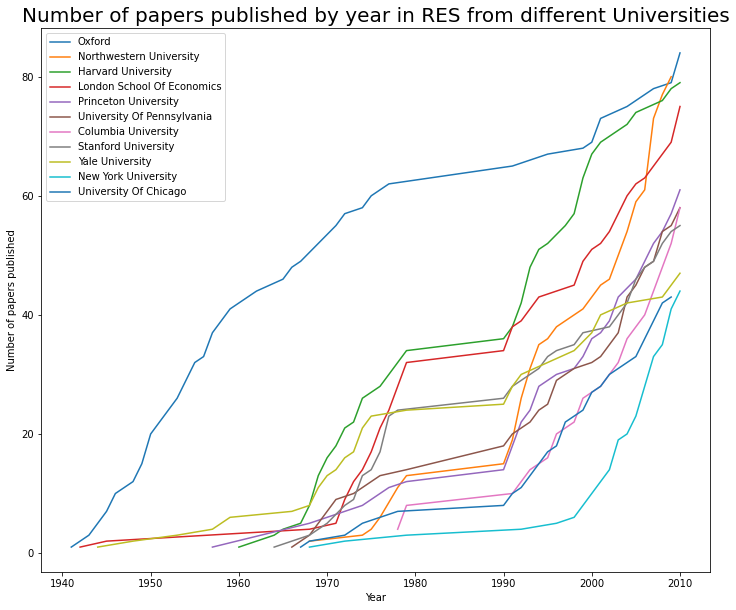

In [ ]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = RES_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')


plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in RES from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()